<a href="https://colab.research.google.com/github/belpa03/webapp/blob/main/EAS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("user_behavior_dataset.csv")
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [4]:
df.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


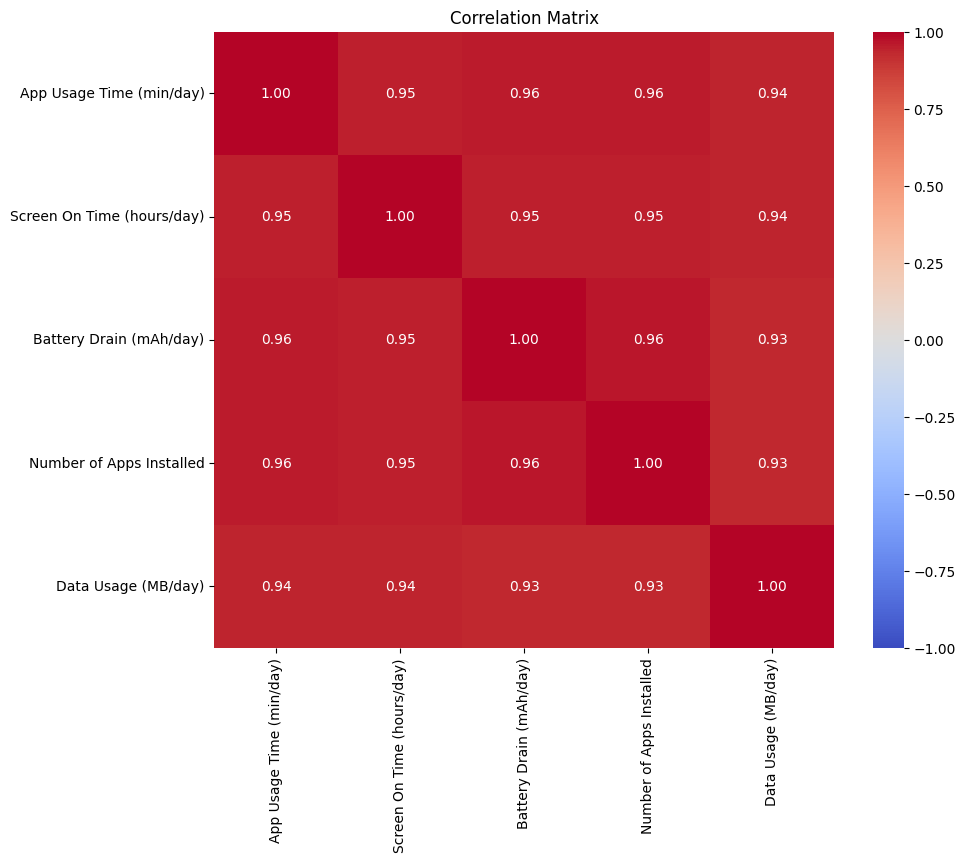

In [5]:
# Pilih hanya kolom numerik
numerical_df = df.select_dtypes(include=['int64', 'float64']).drop(['User ID', 'User Behavior Class', 'Age'], axis=1)

# Buat matriks korelasi
correlation_matrix = numerical_df.corr()

# Visualisasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

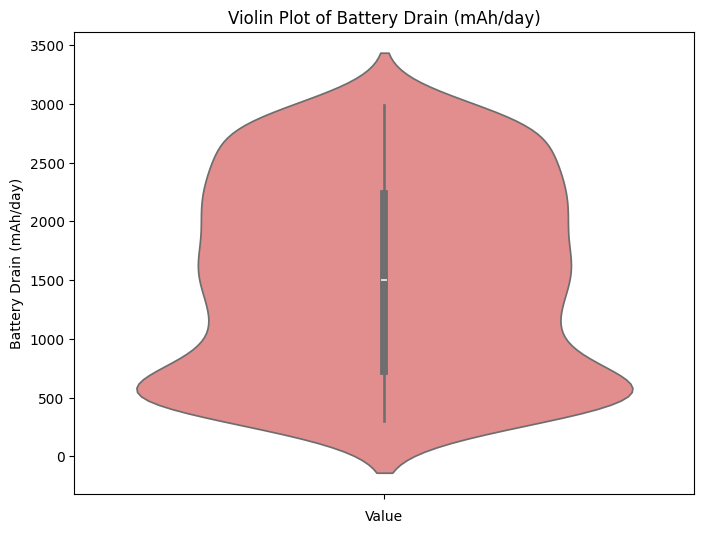

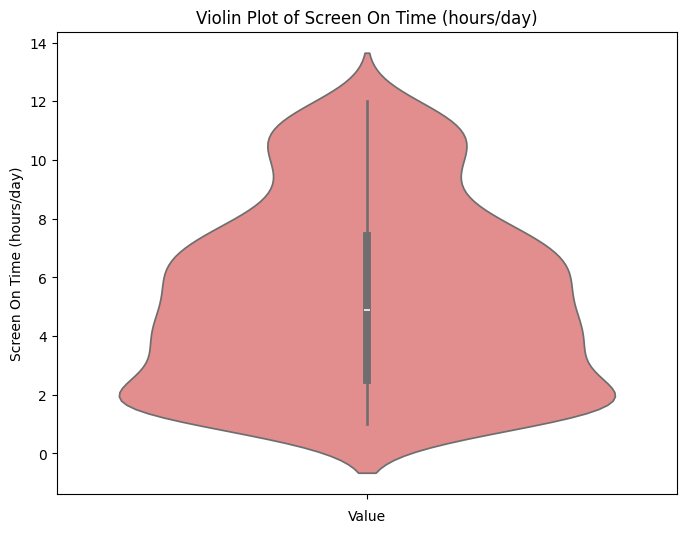

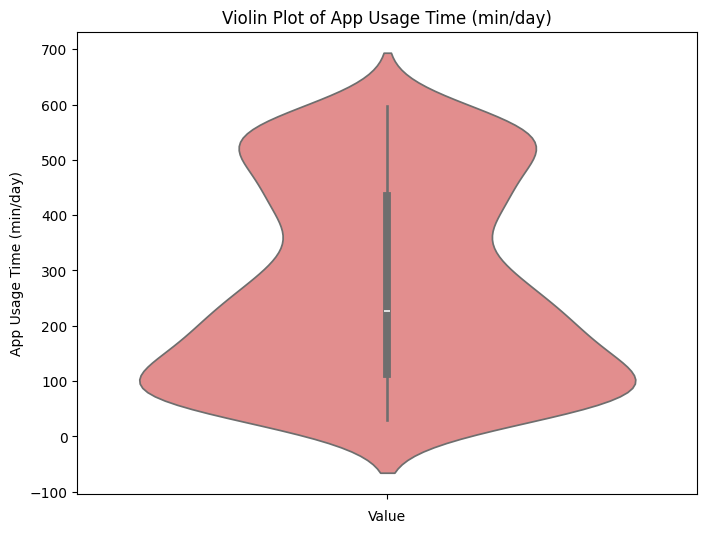

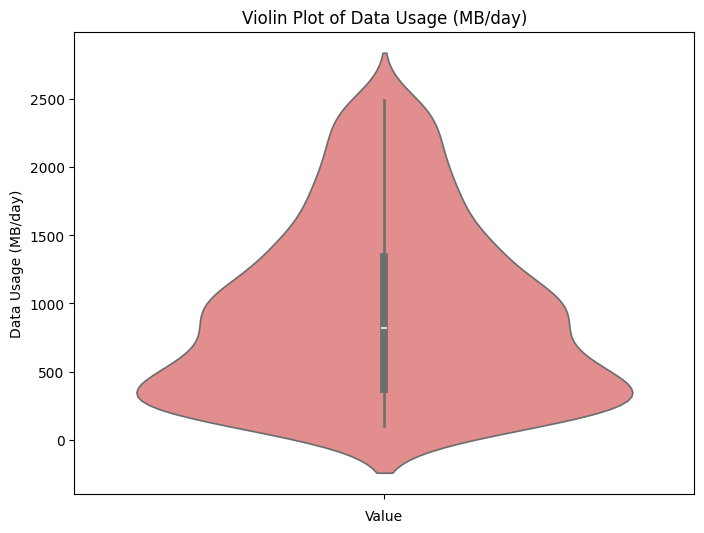

In [6]:
cols_to_plot = ['Battery Drain (mAh/day)', 'Screen On Time (hours/day)', 'App Usage Time (min/day)', 'Data Usage (MB/day)']

for col in cols_to_plot:
    plt.figure(figsize=(8, 6))
    sns.violinplot(y=df[col], color='lightcoral')
    plt.title(f'Violin Plot of {col}')
    plt.xlabel('Value')
    plt.ylabel(col)
    plt.show()

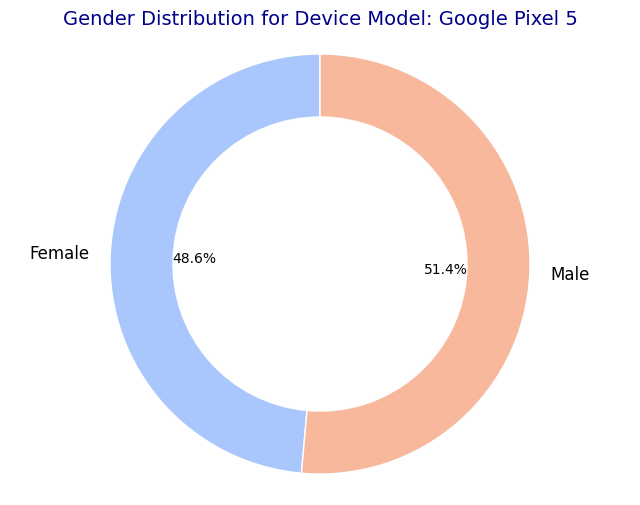

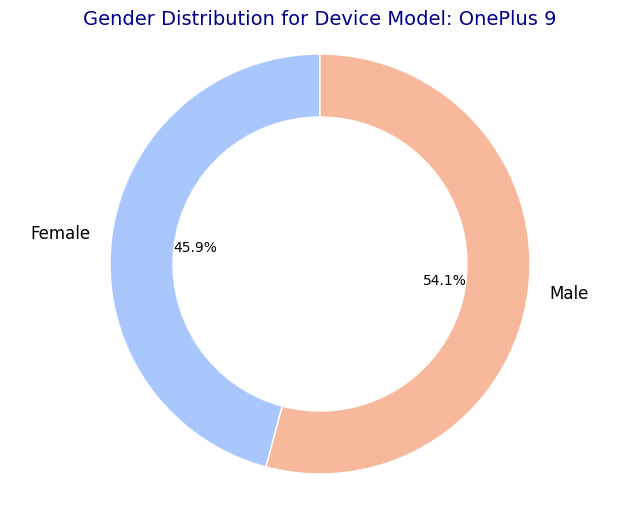

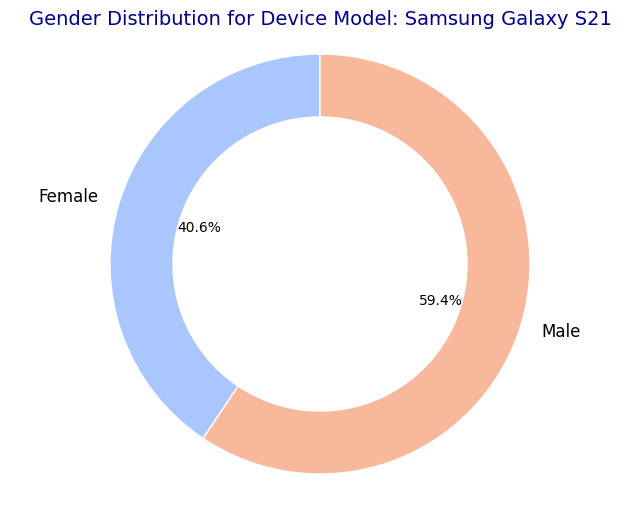

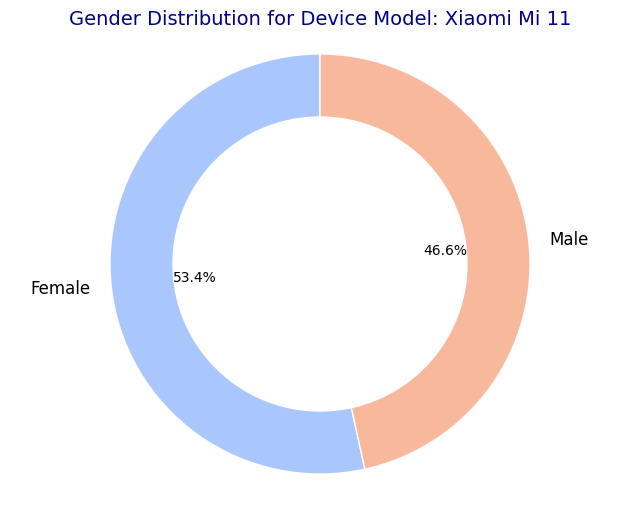

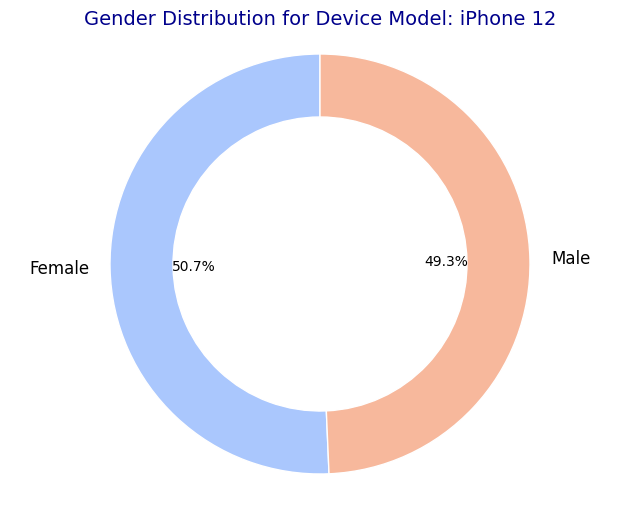

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by device model and gender, and count the number of users
device_gender_counts = df.groupby(['Device Model', 'Gender'])['User ID'].count().unstack()

# Fill NaN values with 0 (if a device model doesn't have a certain gender)
device_gender_counts = device_gender_counts.fillna(0)

# Define a color palette
colors = sns.color_palette("coolwarm", len(device_gender_counts.columns))

# Plot the donut chart for each device model
for device_model in device_gender_counts.index:
    gender_counts = device_gender_counts.loc[device_model]

    plt.figure(figsize=(8, 6))
    wedges, texts, autotexts = plt.pie(
        gender_counts,
        labels=gender_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops=dict(width=0.3, edgecolor='w')  # For donut chart
    )

    # Customize text styles
    plt.setp(autotexts, size=10, color="black")
    plt.setp(texts, size=12)

    # Add a circle in the center for the donut effect
    center_circle = plt.Circle((0, 0), 0.70, fc='white')
    plt.gca().add_artist(center_circle)

    # Add title with custom formatting
    plt.title(
        f"Gender Distribution for Device Model: {device_model}",
        fontsize=14, color="darkblue"
    )

    # Equal aspect ratio ensures the pie is drawn as a circle
    plt.axis('equal')
    plt.show()

<ipython-input-9-925966d1bbed>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='User Behavior Class', palette='viridis')


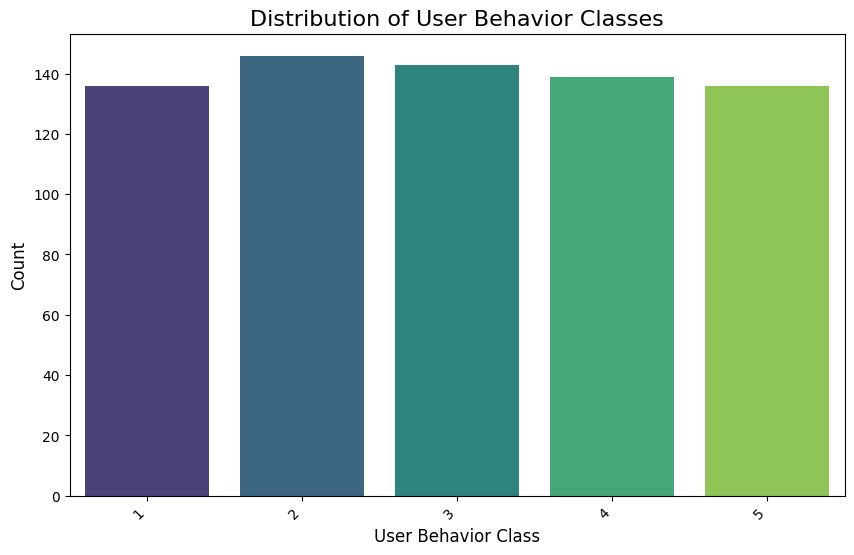

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='User Behavior Class', palette='viridis')
plt.title('Distribution of User Behavior Classes', fontsize=16)
plt.xlabel('User Behavior Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

In [10]:
!pip install -q tensorflow
import tensorflow as tf

In [41]:
X=df.drop(['User Behavior Class'],axis=1)
y=df['User Behavior Class']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=0)

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, 45 to 684
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     560 non-null    int64  
 1   Device Model                560 non-null    object 
 2   Operating System            560 non-null    object 
 3   App Usage Time (min/day)    560 non-null    int64  
 4   Screen On Time (hours/day)  560 non-null    float64
 5   Battery Drain (mAh/day)     560 non-null    int64  
 6   Number of Apps Installed    560 non-null    int64  
 7   Data Usage (MB/day)         560 non-null    int64  
 8   Age                         560 non-null    int64  
 9   Gender                      560 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 48.1+ KB


In [13]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 306 to 417
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     140 non-null    int64  
 1   Device Model                140 non-null    object 
 2   Operating System            140 non-null    object 
 3   App Usage Time (min/day)    140 non-null    int64  
 4   Screen On Time (hours/day)  140 non-null    float64
 5   Battery Drain (mAh/day)     140 non-null    int64  
 6   Number of Apps Installed    140 non-null    int64  
 7   Data Usage (MB/day)         140 non-null    int64  
 8   Age                         140 non-null    int64  
 9   Gender                      140 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 12.0+ KB


In [42]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
X_train = pd.get_dummies(X_train)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Converts strings to integers
one_hot_encoder = OneHotEncoder(sparse_output=False) # Changed 'sparse' to 'sparse_output'
y_train_onehot = one_hot_encoder.fit_transform(y_train_encoded.reshape(-1, 1))

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [44]:
classifier=Sequential()

In [45]:
df.columns.value_counts().sum()

11

In [46]:
classifier = Sequential()
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=X_train.shape[1]))  # Input layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))  # Hidden layer
classifier.add(Dense(units=y_train_onehot.shape[1], kernel_initializer='uniform', activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
model_history=classifier.fit(X_train,y_train_onehot,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.1252 - loss: 1.5819 - val_accuracy: 0.1702 - val_loss: 1.5754
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2127 - loss: 1.5628 - val_accuracy: 0.1702 - val_loss: 1.5500
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2077 - loss: 1.5339 - val_accuracy: 0.1702 - val_loss: 1.5202
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1792 - loss: 1.5102 - val_accuracy: 0.1702 - val_loss: 1.4920
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2813 - loss: 1.3711 - val_accuracy: 0.1915 - val_loss: 1.4698
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2643 - loss: 1.3526 - val_accuracy: 0.3191 - val_loss: 1.4329
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4372 - loss: 1.3174 - val_accuracy: 0.2979 - val_loss: 1.3982
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4044 - loss: 1.3229 - val_accuracy: 0.2979 - 

In [49]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [50]:
accuracy=model_history.history['accuracy']
val_accuracy=model_history.history['val_accuracy']
loss=model_history.history['loss']
val_loss=model_history.history['val_loss']

In [51]:
for epoch in range(len(accuracy)):
    print(f"Epoch {epoch+1}:")
    print(f"  Training Accuracy: {accuracy[epoch]:.4f}")
    print(f"  Validation Accuracy: {val_accuracy[epoch]:.4f}")
    print(f"  Training Loss: {loss[epoch]:.4f}")
    print(f"  Validation Loss: {val_loss[epoch]:.4f}\n")


Epoch 1:
  Training Accuracy: 0.1505
  Validation Accuracy: 0.1702
  Training Loss: 1.5880
  Validation Loss: 1.5754

Epoch 2:
  Training Accuracy: 0.2366
  Validation Accuracy: 0.1702
  Training Loss: 1.5507
  Validation Loss: 1.5500

Epoch 3:
  Training Accuracy: 0.2366
  Validation Accuracy: 0.1702
  Training Loss: 1.5050
  Validation Loss: 1.5202

Epoch 4:
  Training Accuracy: 0.2366
  Validation Accuracy: 0.1702
  Training Loss: 1.4541
  Validation Loss: 1.4920

Epoch 5:
  Training Accuracy: 0.2366
  Validation Accuracy: 0.1915
  Training Loss: 1.4088
  Validation Loss: 1.4698

Epoch 6:
  Training Accuracy: 0.3118
  Validation Accuracy: 0.3191
  Training Loss: 1.3486
  Validation Loss: 1.4329

Epoch 7:
  Training Accuracy: 0.4301
  Validation Accuracy: 0.2979
  Training Loss: 1.3023
  Validation Loss: 1.3982

Epoch 8:
  Training Accuracy: 0.4409
  Validation Accuracy: 0.2979
  Training Loss: 1.2620
  Validation Loss: 1.3713

Epoch 9:
  Training Accuracy: 0.4301
  Validation Accura

In [52]:
import pandas as pd

# Membuat DataFrame untuk hasil pelatihan dan validasi
history_df = pd.DataFrame({
    'Epoch': range(1, len(accuracy) + 1),
    'Training Accuracy': accuracy,
    'Validation Accuracy': val_accuracy,
    'Training Loss': loss,
    'Validation Loss': val_loss
})

# Menampilkan tabel
print(history_df)


    Epoch  Training Accuracy  Validation Accuracy  Training Loss  \
0       1           0.150538             0.170213       1.588024   
1       2           0.236559             0.170213       1.550746   
2       3           0.236559             0.170213       1.504983   
3       4           0.236559             0.170213       1.454127   
4       5           0.236559             0.191489       1.408758   
..    ...                ...                  ...            ...   
95     96           0.784946             0.680851       0.547962   
96     97           0.784946             0.638298       0.545857   
97     98           0.795699             0.659574       0.537582   
98     99           0.752688             0.680851       0.540697   
99    100           0.763441             0.702128       0.543676   

    Validation Loss  
0          1.575390  
1          1.550029  
2          1.520165  
3          1.491990  
4          1.469807  
..              ...  
95         0.721274  
96     

In [53]:
classifier.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 6)                   │             102 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │              35 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 539 (2.11 KB)

 Trainable params: 179 (716.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 360 (1.41 KB)

In [25]:
classifier.get_weights()

[array([[ 0.04418125, -0.03164676,  0.03336308,  0.01828167,  0.01350206,
          0.02300227],
        [-0.01314471,  0.01747023,  0.19413279, -0.00815456, -0.06981624,
          0.18892187],
        [-0.15585603,  0.00514912,  0.30071706,  0.01793333, -0.16677983,
          0.25622228],
        [-0.0034031 , -0.00585185,  0.04014074, -0.00490126,  0.05223266,
          0.01837976],
        [-0.10214117, -0.02503849,  0.2393837 ,  0.04262881,  0.10866973,
          0.00526143],
        [-0.01494004, -0.01609782, -0.01923518,  0.04949268, -0.05389254,
          0.05851476],
        [ 0.47588423,  0.01020915, -0.28789902,  0.47789568,  0.546672  ,
         -0.3796308 ],
        [ 1.2724074 ,  0.0467386 , -1.5293647 ,  0.00844707,  0.9626012 ,
         -1.434054  ],
        [ 0.7913002 , -0.03089098, -0.6096575 ,  0.6921713 ,  0.79612154,
         -0.6547022 ],
        [ 0.9523407 , -0.00804981, -0.9043321 ,  0.20594649,  1.2021124 ,
         -1.1620219 ],
        [ 1.0859736 , -0.04238

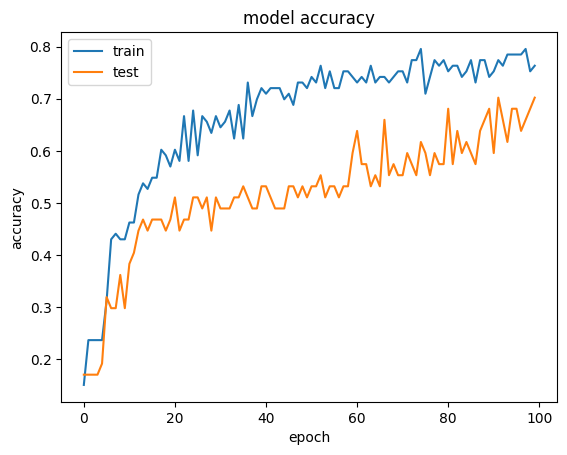

In [54]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

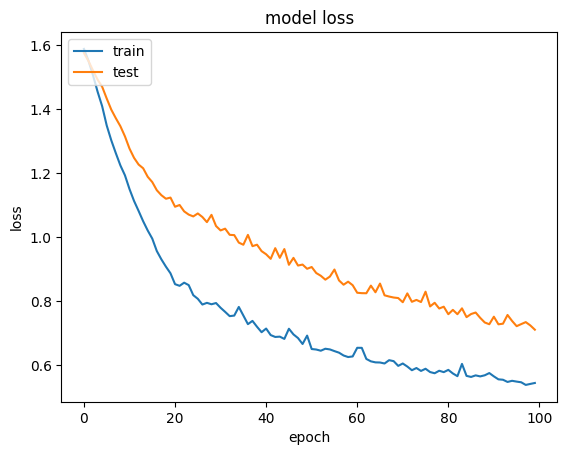

In [55]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
# Predicting the Test set results
X_test = pd.get_dummies(X_test)
X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test = X_test.fillna(0)
y_pred = classifier.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [57]:
 # Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_classes)
cm

array([[ 0,  0,  0,  0,  0,  0],
       [98, 12,  0,  0,  0,  0],
       [13, 92,  5,  1,  0,  0],
       [ 0, 63, 16, 34,  8,  0],
       [ 0,  0, 11, 71, 30,  0],
       [ 0,  0,  0, 11, 95,  0]])

akurasi total

In [38]:
# Pastikan Anda sudah mengimpor LabelEncoder dan OneHotEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

# Encode label y_test menggunakan LabelEncoder
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  # Mengubah label menjadi angka

# Lakukan one-hot encoding pada y_test yang sudah di-encode
# Ganti 'sparse' dengan 'sparse_output'
one_hot_encoder = OneHotEncoder(sparse_output=False)  # Mengubah menjadi format one-hot encoding
y_test_onehot = one_hot_encoder.fit_transform(y_test_encoded.reshape(-1, 1))

# Sekarang, Anda dapat melakukan evaluasi pada data uji
test_loss, test_accuracy = classifier.evaluate(X_test, y_test_onehot, batch_size=10)

# Menampilkan hasil akurasi dan loss pada data uji
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6640 - loss: 0.5890 
Test Loss: 0.5361
Test Accuracy: 70.71%


In [39]:
# Prediksi kelas pada data uji
y_pred = classifier.predict(X_test)

# Mengambil kelas yang diprediksi (kelas dengan probabilitas tertinggi)
y_pred_classes = y_pred.argmax(axis=1)

# Menghitung akurasi secara manual
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_classes)

# Menampilkan hasil akurasi
print(f"Test Accuracy: {accuracy * 100:.2f}%")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Test Accuracy: 26.43%


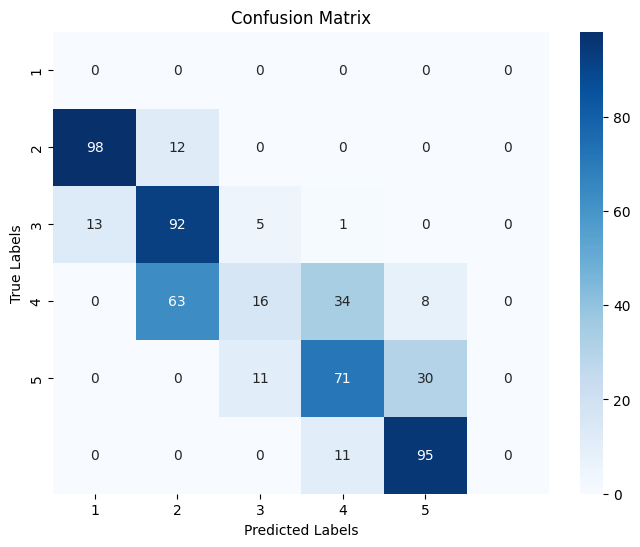

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Menampilkan confusion matrix dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Streamlit

In [59]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.2 MB/s eta 0:00:00


2024-11-28 03:04:36.918 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 03:04:37.443 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-11-28 03:04:37.458 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 03:04:37.461 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 03:04:37.468 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 03:04:37.473 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 03:04:37.482 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-28 03:04:37.491 Thread 'MainThread': mi

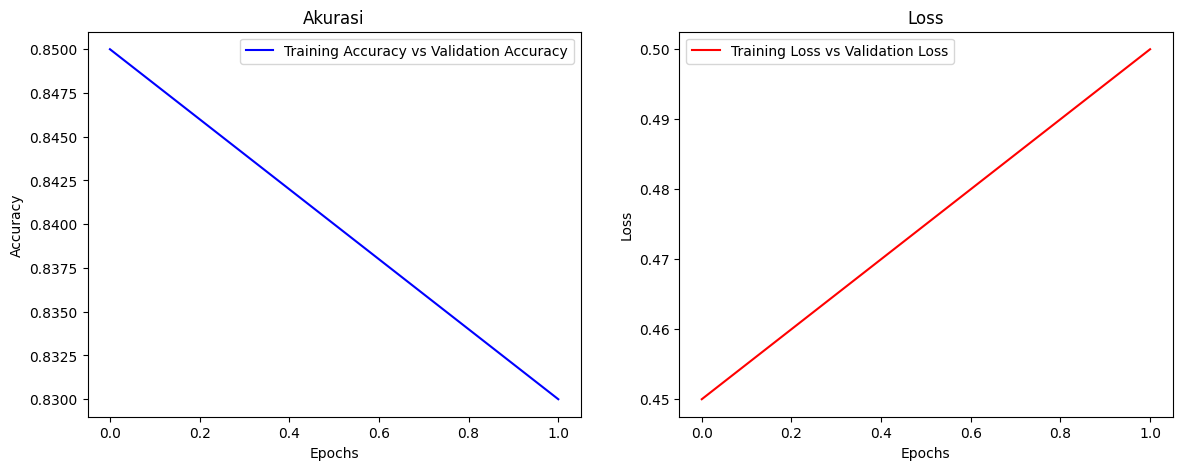

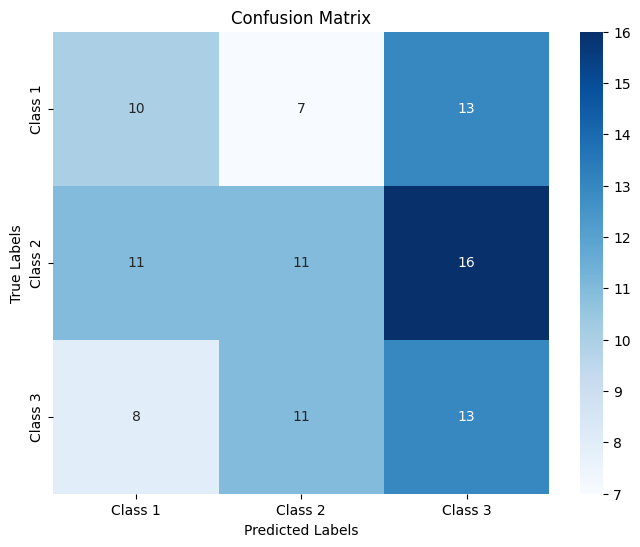

In [60]:
import streamlit as st
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import tensorflow as tf

# Load data dan model (pastikan model sudah dilatih sebelumnya)
# Contoh muat model jika perlu
# classifier = tf.keras.models.load_model('path_to_your_model.h5')

# Menampilkan judul aplikasi
st.title("Dashboard Model Neural Network")

# Menampilkan informasi model
st.header("Model Overview")
st.write("""
    Di sini Anda dapat melihat performa model neural network yang telah dilatih.
    Dashboard ini menunjukkan akurasi, loss, confusion matrix, dan beberapa grafik lainnya.
""")

# Misalnya model sudah dilatih dan kita punya hasil akurasi dan loss dari `model_history`
# Untuk tujuan demo, mari gunakan nilai statis untuk akurasi dan loss, seharusnya ini diambil dari model Anda.
accuracy = 0.85  # contoh nilai akurasi model
val_accuracy = 0.83  # contoh nilai akurasi validasi
loss = 0.45  # contoh nilai loss
val_loss = 0.50  # contoh nilai loss validasi

# Menampilkan akurasi dan loss pada streamlit
st.subheader("Hasil Akurasi dan Loss")
st.write(f"**Akurasi pada data pelatihan**: {accuracy * 100:.2f}%")
st.write(f"**Akurasi pada data validasi**: {val_accuracy * 100:.2f}%")
st.write(f"**Loss pada data pelatihan**: {loss:.4f}")
st.write(f"**Loss pada data validasi**: {val_loss:.4f}")

# Plot Akurasi dan Loss
st.subheader("Grafik Akurasi dan Loss")
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Akurasi
ax[0].plot([accuracy, val_accuracy], label="Training Accuracy vs Validation Accuracy", color="blue")
ax[0].set_title("Akurasi")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].legend()

# Plot Loss
ax[1].plot([loss, val_loss], label="Training Loss vs Validation Loss", color="red")
ax[1].set_title("Loss")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
ax[1].legend()

st.pyplot(fig)

# Confusion Matrix
st.subheader("Confusion Matrix")
# Misalnya kita sudah punya confusion matrix
# y_test dan y_pred_classes harus ada hasilnya sebelumnya, misalnya dari model.predict()
y_test = np.random.randint(0, 3, 100)  # contoh label data uji (asumsi 3 kelas)
y_pred_classes = np.random.randint(0, 3, 100)  # prediksi model (asumsi 3 kelas)

cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 1", "Class 2", "Class 3"], yticklabels=["Class 1", "Class 2", "Class 3"])
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")

st.pyplot(fig)

# Form untuk input prediksi baru
st.header("Coba Prediksi Baru")

# Form input untuk prediksi
input_data = {}
input_data['Feature 1'] = st.number_input('Masukkan Nilai Fitur 1', min_value=0.0, max_value=100.0, value=50.0)
input_data['Feature 2'] = st.number_input('Masukkan Nilai Fitur 2', min_value=0.0, max_value=100.0, value=30.0)
input_data['Feature 3'] = st.number_input('Masukkan Nilai Fitur 3', min_value=0.0, max_value=100.0, value=20.0)

# Tombol prediksi
if st.button('Prediksi'):
    # Preprocessing input jika perlu (normalisasi, encoding, dll)
    input_array = np.array([[input_data['Feature 1'], input_data['Feature 2'], input_data['Feature 3']]])

    # Prediksi
    prediction = classifier.predict(input_array)  # Gunakan model Anda untuk prediksi
    predicted_class = np.argmax(prediction, axis=1)

    st.write(f"Prediksi Kelas: {predicted_class[0]}")
